# **Trabajo Final Primer Parcial Vision Por Computadora** 

## **Definición de Código y Aplicacion de Filtros**

En esta parte, vamos a ir definiendo en el código paso por paso, desde cargar la imagen hasta ir aplicando varios filtos cómo los de suavizado (promedio y gaussiano), de deteccion de bordes(sobel y canny), de filtro personalizado, también, utilicé varias bibliotecas que estan disponibles en OpenCV cómo: cv2, numpy, ipwidgets, IPython.display y matplotlib.pyplot. Estas librerias me fueron de gran ayuda para ir definiendo las funciones, realizar cambio de colores a la imagen utilizada, defubuebdi las funciones que daran la lógica para aplicar los filtros mencionados anteriormente, el kernel para el filtro personalizado y una comparación completa entre todas las imagenes con filtros aplicadas.

[[0.03703704 0.03703704 0.03703704]
 [0.03703704 0.03703704 0.03703704]
 [0.03703704 0.03703704 0.03703704]]


(<Axes: title={'center': 'Imagen Filtro Personalizado'}>,
 Text(0.5, 1.0, 'Imagen Filtro Personalizado'),
 (-0.5, 1023.5, 1023.5, -0.5))

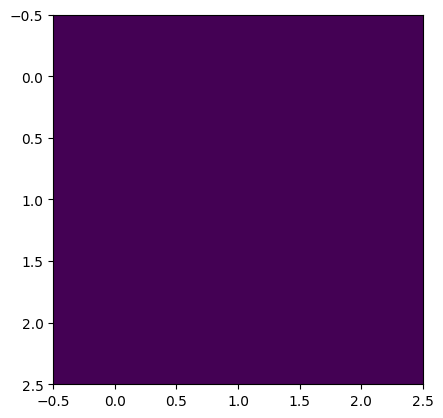

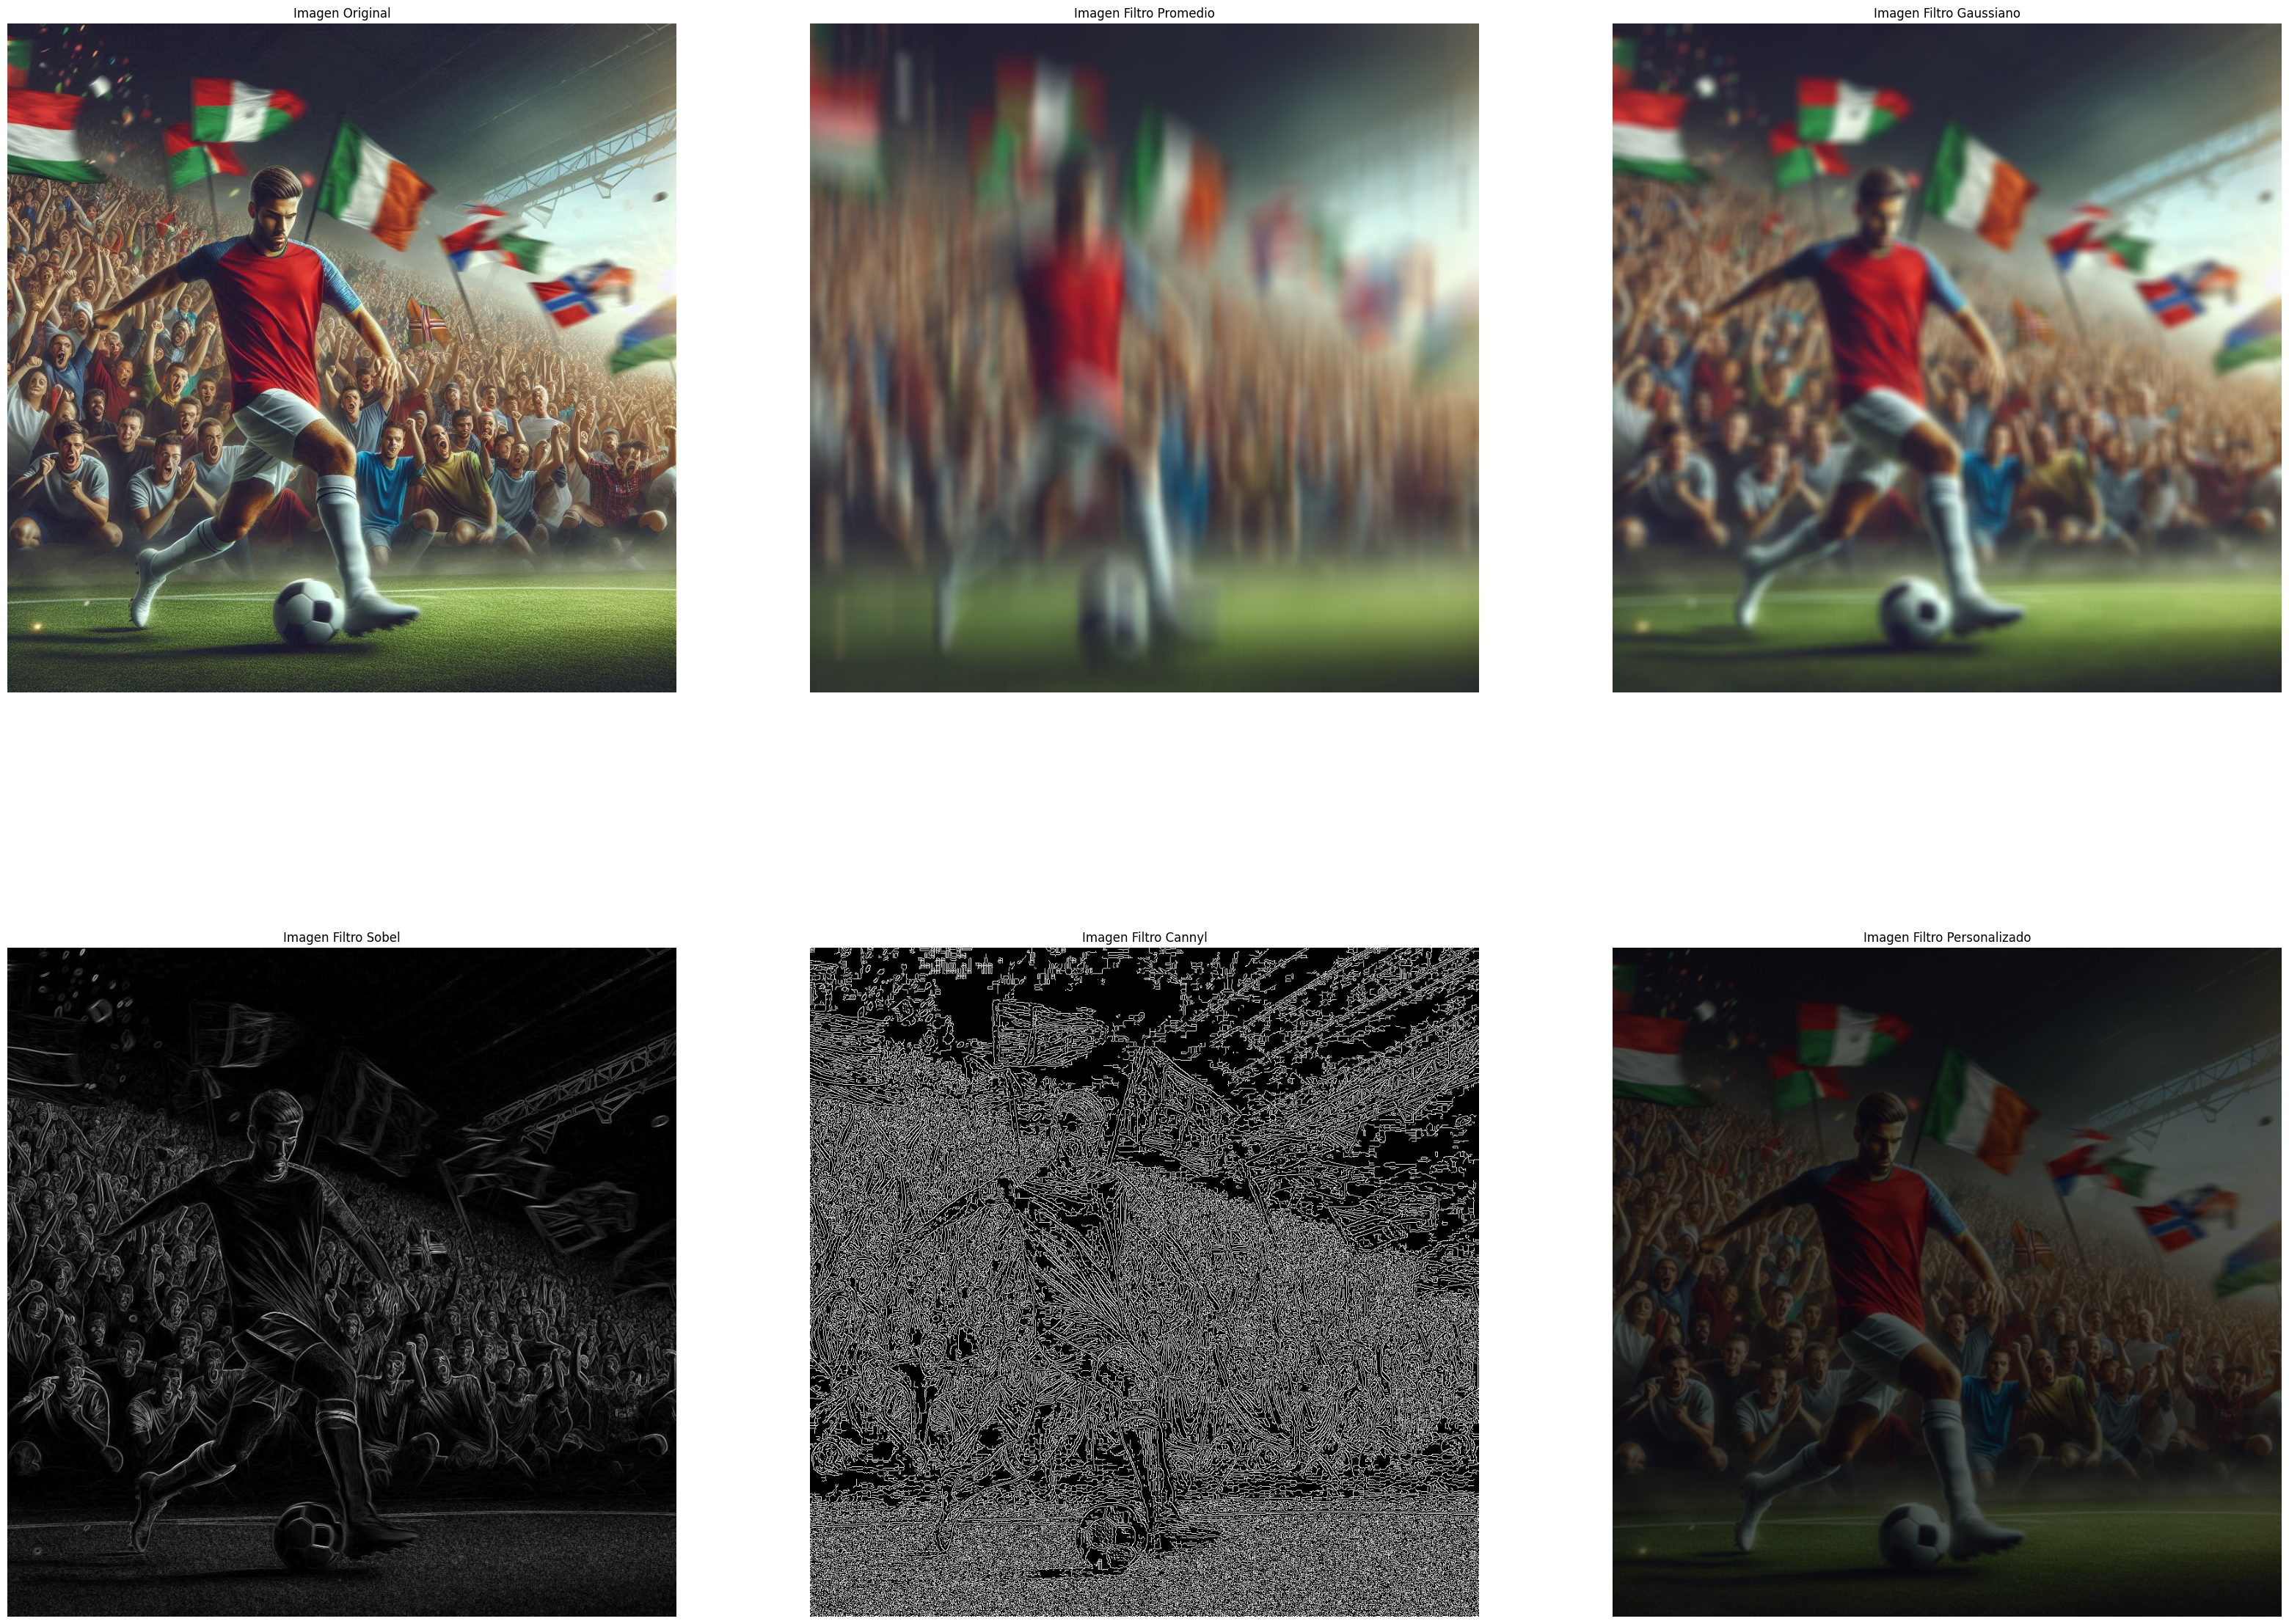

In [271]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

#Entrada: Ruta de la imagen 
#Proceso: Cargar la imagen
#Salida: La imagen seleccionada 
def cargar_imagen(ruta):
    imagen = cv2.imread(ruta)
    return imagen

#Entrada: Imagen sin de color
#Proceso: Definir color rgb
#Salida: Imagen con color RGB
imagen_sin_definir_color=cargar_imagen('th.png')
imagen_original =cv2.cvtColor(imagen_sin_definir_color, cv2.COLOR_BGR2RGB)

#APLICACION DE FILTROS DE SUAVIZADO

#Entrada Imagen Original
#Proceso: Aplicar de filtro promedio
#Salida: Imagen con filtro promedio
def aplicar_filtro_promedio(imagen_original):
    aplicacion_filtro_promedio = cv2.blur(imagen_original, (10, 100))
    return aplicacion_filtro_promedio
    
imagen_filtro_promedio = aplicar_filtro_promedio(imagen_original)

#Entrada: Imagen Original
#Proceso: Aplicar filtro gaussiano
#Salida: Imagen con filtro gaussiano
def aplicar_filtro_gaussiano(imagen_original, size):
    aplicacion_filtro_gaussiano = cv2.GaussianBlur(imagen_original, (size, size), 45)
    return aplicacion_filtro_gaussiano

imagen_filtro_gaussiano = aplicar_filtro_gaussiano(imagen_original, 15)

#APLICACIÓN DE FILTROS DE DETECCION DE BORDES
#Cambiar la escala de color a grises para visualizar mejor los filtros
imagen_original_gray = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)

#Entrada: Imagen Original Gris
#Proceso: Aplicar filtro sobel
#Salida: Imagen con filtro sobel
def aplicar_filtro_sobel(imagen_original_gray, size):
    aplicacion_filtro_sobel_x = cv2.Sobel(imagen_original_gray, cv2.CV_64F, 1, 0, (size, size))
    aplicacion_filtro_sobel_y = cv2.Sobel(imagen_original_gray, cv2.CV_64F, 0, 1, (size, size))
    sobel = cv2.magnitude(aplicacion_filtro_sobel_x, aplicacion_filtro_sobel_y)
    return sobel

imagen_filtro_sobel = aplicar_filtro_sobel(imagen_original_gray, 10)

#Entrada:Imagen Original Gris
#Proceso:Aplicar filtro canny
#Salida: Imagen con filtro canny

def aplicar_filtro_canny (imagen_original_gray):
    aplicacion_filtro_canny = cv2.Canny(imagen_original_gray, -1, 25, 34)
    return aplicacion_filtro_canny

imagen_filtro_canny = aplicar_filtro_canny(imagen_original_gray)

#APLICACION DE FILTRO PERSONALIZADO
#Prueba kernel
#Definir el Kernel
k = 1
tamano = 2 * k + 1
kernel = np.ones((  tamano, tamano), np.float64) /(tamano**3)

print(kernel)
plt.imshow(kernel)

#Entrada: Imagen Original 
#Proceso: Aplicar filtro personalizado y definir el tamaño de la figura
#Salida: Imagen con filtro personalizado

imagen_filtro_personalizado = cv2.filter2D(imagen_original, -1, kernel)
plt.figure(figsize=(40,60))



plt.subplot(1, 3, 1), plt.imshow(imagen_original), plt.title("Imagen Original"), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(imagen_filtro_promedio), plt.title("Imagen Filtro Promedio"), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(imagen_filtro_gaussiano), plt.title("Imagen Filtro Gaussiano"), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(imagen_filtro_sobel, cmap='gray'), plt.title("Imagen Filtro Sobel"), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(imagen_filtro_canny, cmap='gray'), plt.title("Imagen Filtro Cannyl"), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(imagen_filtro_personalizado), plt.title("Imagen Filtro Personalizado"), plt.axis('off')



## **Aplicación de Filtros y Comparación con la Imagen Original**

### **Aplicación de Filtros de Suavizado**

#### **Filtro Promedio**

Aquí se fue realizando la comparación de la imagen original sin filtro y la imagen ya con el filtro promedio aplicado, y podemos ver cómo es ampliamente notable la diferencia entre una imagen y otra, en la imagen con el filtro aplicado podemos observar claramente cómo el suavizado es borroso.

(<Axes: title={'center': 'Imagen Filtro Promedio'}>,
 Text(0.5, 1.0, 'Imagen Filtro Promedio'),
 (-0.5, 1023.5, 1023.5, -0.5))

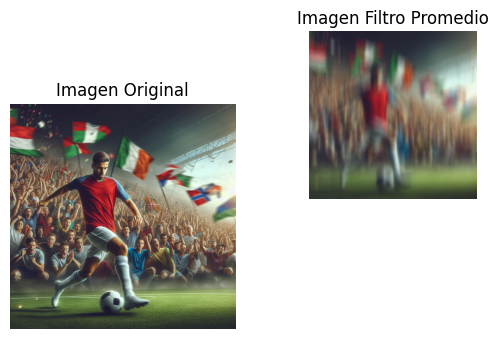

In [274]:
#Comparación de imagen original e imagen con filtro promedio

plt.subplot(1, 2, 1), plt.imshow(imagen_original), plt.title("Imagen Original"), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(imagen_filtro_promedio), plt.title("Imagen Filtro Promedio"), plt.axis('off')


### **Filtro Gaussiano**

En esta aplicación y comparación de la imagen con el filtro gaussiano con la imagen original, podemos apreciar cómo el filtro le da una suavidad más nitida y no tan borrosa a comparación del filtro promedio.

(<Axes: title={'center': 'Imagen Filtro Gaussiano'}>,
 Text(0.5, 1.0, 'Imagen Filtro Gaussiano'),
 (-0.5, 1023.5, 1023.5, -0.5))

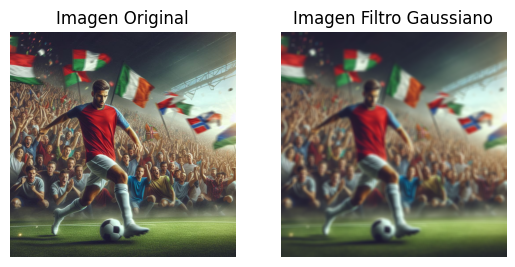

In [278]:
#Comparación de imagen original e imagen con filtro gaussiano

plt.subplot(1, 2, 1), plt.imshow(imagen_original), plt.title("Imagen Original"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(imagen_filtro_gaussiano), plt.title("Imagen Filtro Gaussiano"), plt.axis('off')

### **Aplicación de Filtros de Detección de Bordes**

### **Filtro Sobel**

En esta se tuvo que cambiar el color de la imagen original por un color de escala de grises para mejorar la aplicación de este filtro sobel, cuando aplicamos el filtro podemos observar que los bordes se resaltan pero con un color suave y totalmente visible. 

(<Axes: title={'center': 'Imagen Original'}>,
 Text(0.5, 1.0, 'Imagen Original'),
 (-0.5, 1023.5, 1023.5, -0.5))

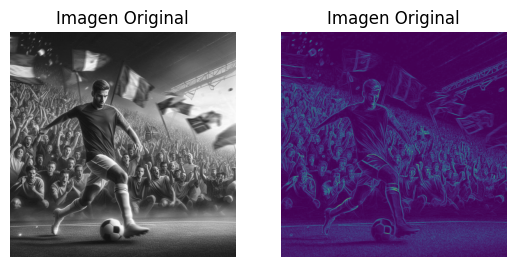

In [275]:
#Comparacion de imagen original en escala de grises e imagen con filtro sobel para mejor visualización de bordes

imagen_original_gray = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1), plt.imshow(imagen_original_gray, cmap='gray'), plt.title('Imagen Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(imagen_filtro_sobel), plt.title('Imagen Original'), plt.axis('off')

### **Filtro Canny**

En este tambien al igual que en el filtro sobel, se tuvo que cambiar los colores de la imagen original a 

(<Axes: title={'center': 'Imagen Original'}>,
 Text(0.5, 1.0, 'Imagen Original'),
 (-0.5, 1023.5, 1023.5, -0.5))

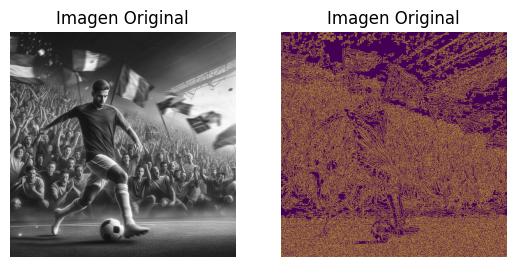

In [276]:
#Comparacion de imagen original en escala de grises e imagen con filtro canny para mejor visualización de bordes

imagen_original_gray = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 2, 1), plt.imshow(imagen_original_gray, cmap='gray'), plt.title('Imagen Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(imagen_filtro_canny), plt.title('Imagen Original'), plt.axis('off')


## **Aplicación de Filtro Personalizado**

### **Filtro Personalizado**

(<Axes: title={'center': 'Imagen Original'}>,
 Text(0.5, 1.0, 'Imagen Original'),
 (-0.5, 1023.5, 1023.5, -0.5))

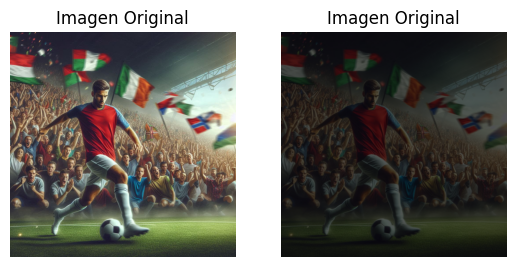

In [277]:
#Comparación de imagen original e imagen con filtro personalizado

plt.subplot(1, 2, 1), plt.imshow(imagen_original), plt.title('Imagen Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(imagen_filtro_personalizado), plt.title('Imagen Original'), plt.axis('off')


## **Aplicación de Widgets Interactivos**

### **Modificación Tamaño del Kernel**

In [279]:
#Entrada: Imagen Original
#Proceso: Definir tamaño del kernel y Aplicar filtro gaussiano
#Salida: Imagen con filtro gaussiano modificable

def aplicar_filtro_gaussiano_kernel(ksize):
    if ksize %2 == 0:
        ksize += 1
        return ksize
    imagen_filtro_gaussiano_w_kernel = cv2.GaussianBlur(imagen_original, (ksize, ksize), 5)
    plt.imshow(imagen_filtro_gaussiano_w_kernel, cmap='gray')
    plt.title(f'Filtro Gaussiano Modificar -  Tamaño del Kernel: {ksize}x{ksize} ')
    plt.show()

#Entrada: Control deslizante para ajustar el valor de sigma
#Proceso: Ajustar el tamaño mediante el movimiento de la ruedita deslizante
#Salida: Observar en tiempo real el aumento del tamaño del kernel
ruedita_tamaño_kernel = widgets.IntSlider(value=2, min=1, max=255, step=2, description='Modificar Tamaño')
widgets.interactive(aplicar_filtro_gaussiano_kernel, ksize= ruedita_tamaño_kernel)

interactive(children=(IntSlider(value=2, description='Modificar Tamaño', max=255, min=1, step=2), Output()), _…

### **Modificación de Sigma**

In [281]:
#Entrada: Imagen Original, tamaño y sigma
#Proceso: Aplicar filtro gaussiano
#Salida: Imagen con filtro gaussiano
def aplicar_filtro_gaussiano_sigma(imagen_original, size, sigma):
    aplicacion_filtro_gaussiano = cv2.GaussianBlur(imagen_original, (size, size), sigma)
    return aplicacion_filtro_gaussiano

#Entrada: Imagen con el filtro gaussiano
#Proceso: Mostrar la imagen con el filtro gaussiano aplicado, 
#Salida: Imagen filtro gaussiano aplicado y valor de sigma
def modificar_sigma(sigma):
    imagen_filtro_gaussiano_simga_mod = aplicar_filtro_gaussiano_sigma(imagen_original, 15,sigma)
    plt.figure(figsize=(8,6))
    plt.imshow(imagen_filtro_gaussiano_simga_mod)
    plt.axis('off')
    plt.title(f'Filtro Gaussiano - Modificación Sigma: {sigma}')
    plt.show

#Entrada: Control deslizante para ajustar el valor de sigma
#Proceso: Ajustar el valor de sigma con el movimiento de la ruedita
#Salida: Ver en tiempo real como se suaviza la imagen
ruedita_modificadora_sigma = widgets.FloatLogSlider(value=1, min=1.0, max=30.0, step=0.01, description = 'Sigma')
widgets.interactive(modificar_sigma, sigma= ruedita_modificadora_sigma)


interactive(children=(FloatLogSlider(value=10.0, description='Sigma', max=30.0, min=1.0, step=0.01), Output())…

### **Modificación del Umbral en Canny**

In [255]:
#Entrada: Imagen escala de grises, umbral bajo y alto
#Proceso: Aplicar filtro canny para detectar bordes
#Salida: Imagen con filtro canny
def aplicar_filtro_canny (imagen_original_gray, low_threshold, high_threshold ):
    aplicacion_filtro_canny = cv2.Canny(imagen_original_gray, -1, low_threshold, high_threshold)
    return aplicacion_filtro_canny

#Entrada: Imagen con filtro canny 
#Proceso: Agregar umbrales modificables
#Salida: Imagen con filtro canny y umbrales ajustables 
def modificar_umbral( low_threshold, high_threshold):
    imagen_filtro_canny = cv2.Canny(imagen_original_gray, low_threshold, high_threshold)
    
    plt.imshow(imagen_filtro_canny, cmap ='gray')
    plt.axis('off')
    plt.title(f'Filtro Canny - Umbral Bajo: {low_threshold}, Umbral Alto: {high_threshold}')
    plt.show()

#Entrada: Control deslizantes para ajustar el valor de los umbrales
#Proceso: Ajustar el valor de los umbrales mediante el movimiento de la ruedita
#Salida: Observar en tiempo el aumento y reducción de los umbrales
ruedita_umbral_bajo = widgets.IntSlider(value=1, min=0, max=255, step=1, description='Umbral Bajo')
ruedita_umbral_alto = widgets.IntSlider(value=1, min=0, max=255, step=1, description='Umbral Alto')
widgets.interactive(modificar_umbral, low_threshold=ruedita_umbral_bajo, high_threshold=ruedita_umbral_alto)


interactive(children=(IntSlider(value=1, description='Umbral Bajo', max=255), IntSlider(value=1, description='…